In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([1])

In [8]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.15.0'

In [9]:

keras.__version__

'3.4.1'

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

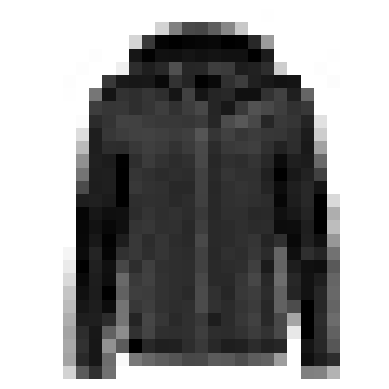

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

D:\shr\Django\Machine-Learning-Specials\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6834 - loss: 0.9825 - val_accuracy: 0.8238 - val_loss: 0.5195
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.8241 - loss: 0.4989 - val_accuracy: 0.8456 - val_loss: 0.4545
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.8431 - loss: 0.4463 - val_accuracy: 0.8558 - val_loss: 0.4234
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.8540 - loss: 0.4161 - val_accuracy: 0.8606 - val_loss: 0.4021
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.8609 - loss: 0.3945 - val_accuracy: 0.8654 - val_loss: 0.3870
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.8664 - loss: 0.3777 - val_accuracy: 0.8670 - val_loss: 0.3761
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.8703 - loss: 0.3639 - val_accuracy: 0.8698 - val_loss: 0.3658
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.8742 - l

In [25]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [26]:

print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [27]:

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Saving figure keras_learning_curves_plot


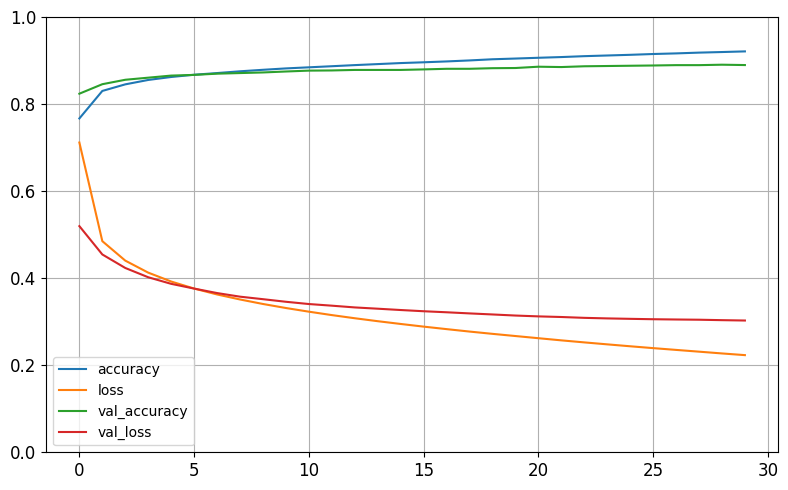

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8757 - loss: 0.3437


[0.3412390351295471, 0.8781999945640564]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([9, 2, 1], dtype=int64)

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


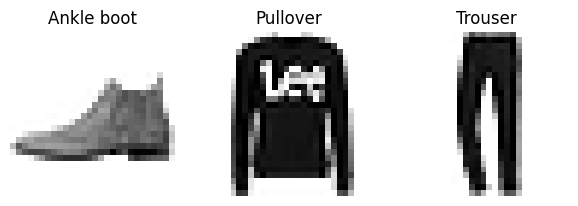

In [34]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

**Regression MLP**

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


D:\shr\Django\Machine-Learning-Specials\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 3.2070 - val_loss: 1.1467
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.9462 - val_loss: 0.7276
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.7663 - val_loss: 0.6365
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.7009 - val_loss: 0.5891
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.6572 - val_loss: 0.5555
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.6237 - val_loss: 0.5289
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.5964 - val_loss: 0.5073
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.5739 - val_loss: 0.4894
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.5548 - val_loss: 0.4742
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 0.5382 - val_loss: 0.4614
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.5238 - val_loss: 0.4507
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

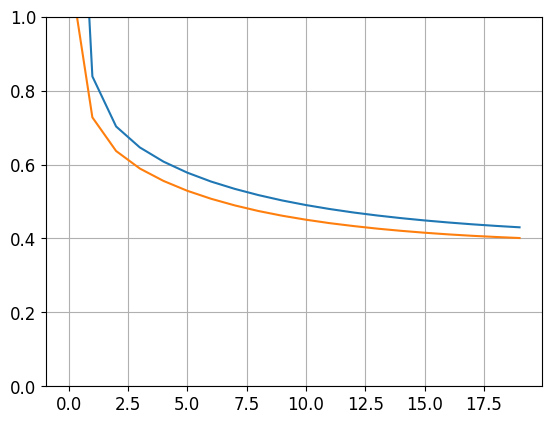

In [38]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
y_pred

array([[0.52403224],
       [1.5616736 ],
       [3.3048503 ]], dtype=float32)

**Functional API**

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [42]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 30)                │             270 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 30)                │             930 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 38)                │               0 │ input_layer_2[0][0],       │
│                               │                           │                 │ dense_6[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 1)                 │              39 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 2.9418 - val_loss: 1.2446
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.6823 - val_loss: 0.5727
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.6250 - val_loss: 0.5534
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 0.5957 - val_loss: 0.5231
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.5718 - val_loss: 0.5057
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.5520 - val_loss: 0.4902
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.5352 - val_loss: 0.4775
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.5205 - val_loss: 0.4660
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.5075 - val_loss: 0.4563
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.4959 - val_loss: 0.4480
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.4856 - val_loss: 0.4414
Epoch 12/20
363/363 ━━━━━━━━━━

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 3.4078 - val_loss: 1.0666
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.8360 - val_loss: 0.6716
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.6954 - val_loss: 0.5983
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.6371 - val_loss: 0.5527
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.5981 - val_loss: 0.5177
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 0.5674 - val_loss: 0.4896
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.5425 - val_loss: 0.4675
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.5225 - val_loss: 0.4507
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.5066 - val_loss: 0.4379
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.4939 - val_loss: 0.4283
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.4839 - val_loss: 0.4211
Epoch 12/20
363/363 ━━━━━━━━━━

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [49]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 3.2996 - val_loss: 1.8179
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 1.1745 - val_loss: 0.9960
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.8965 - val_loss: 0.9366
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.7627 - val_loss: 0.8714
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.6920 - val_loss: 0.7864
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.6475 - val_loss: 0.7035
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.6161 - val_loss: 0.6338
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.5928 - val_loss: 0.5816
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.5750 - val_loss: 0.5452
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 0.5615 - val_loss: 0.5211
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.5509 - val_loss: 0.5051
Epoch 12/20
363/363 ━━━━━━━━━━

In [50]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.4832


TypeError: cannot unpack non-iterable float object

**The subclassing API**

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

In [ ]:
model.save("my_keras_model.keras")

In [ ]:

model = keras.models.load_model("my_keras_model.keras")

In [ ]:

model.predict(X_new)

In [ ]:
model.save_weights("my_keras_weights.ckpt")

In [ ]:
model.load_weights("my_keras_weights.ckpt")

**Using Callbacks during Training**

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.keras") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

mse_test = model.evaluate(X_test, y_test)

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

**TensorBoard**

In [52]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [53]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2024_08_03-12_04_52'

In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

D:\shr\Django\Machine-Learning-Specials\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

NameError: name 'checkpoint_cb' is not defined

In [57]:
#%load_ext tensorboard
#%tensorboard --logdir=./my_logs --port=6007

In [58]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2024_08_03-12_04_53'

In [59]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [61]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

NameError: name 'checkpoint_cb' is not defined

**Hyperparameter Tuning**

In [62]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [64]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model)

In [65]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
  1/363 ━━━━━━━━━━━━━━━━━━━━ 40s 111ms/step - loss: 6.7747

D:\shr\Django\Machine-Learning-Specials\venv\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 2.1428 - val_loss: 7.4565
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.6598 - val_loss: 6.6813
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.5816 - val_loss: 3.2052
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.5263 - val_loss: 2.2171
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.4953 - val_loss: 0.9350
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.4724 - val_loss: 0.8456
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.4586 - val_loss: 0.4913
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.4476 - val_loss: 0.5269
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.4397 - val_loss: 0.4094
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.4328 - val_loss: 0.4350
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.4272 - val_loss: 0.3862
Epoch 12/100
363/363 ━━━━━━━━━━

KerasRegressor(
	model=<function build_model at 0x000001B77F533E20>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [66]:
mse_test = keras_reg.score(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


In [67]:
y_pred = keras_reg.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [68]:
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: Invalid parameter n_neurons for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(n_neurons=28)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
rnd_search_cv.best_params_
rnd_search_cv.best_score_
rnd_search_cv.best_estimator_
rnd_search_cv.score(X_test, y_test)
model = rnd_search_cv.best_estimator_.model
model

In [71]:
model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 5.8582


5.844110488891602

**10.**

In [72]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [73]:
X_train_full.shape

(60000, 28, 28)

In [74]:
X_train_full.dtype

dtype('uint8')

In [75]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

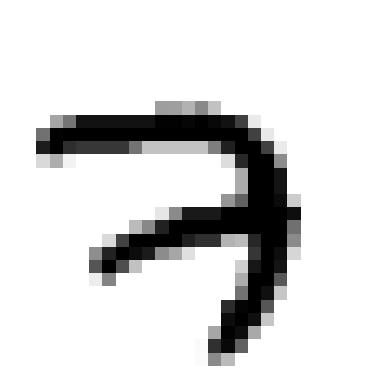

In [76]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [77]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [78]:
X_valid.shape

(5000, 28, 28)

In [79]:
X_test.shape

(10000, 28, 28)

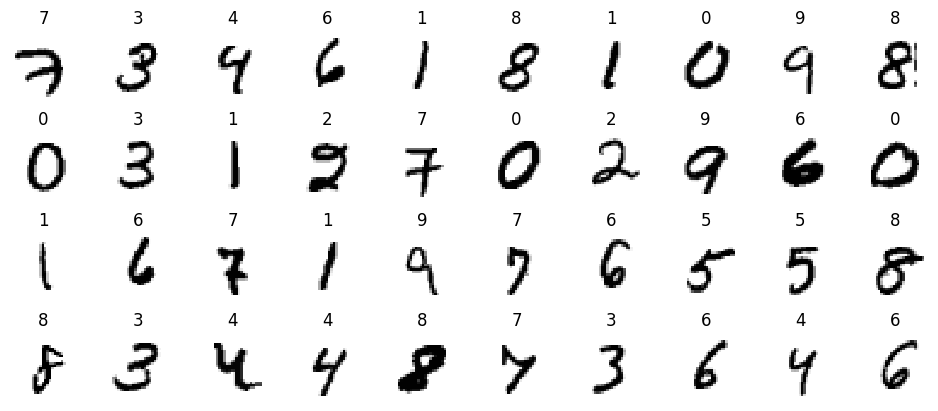

In [80]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [81]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [83]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

D:\shr\Django\Machine-Learning-Specials\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [85]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

AttributeError: 'str' object has no attribute 'name'

C:\Users\Rostami_pc\AppData\Local\Temp\ipykernel_11856\2891158959.py:4: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])


Text(0, 0.5, 'Loss')

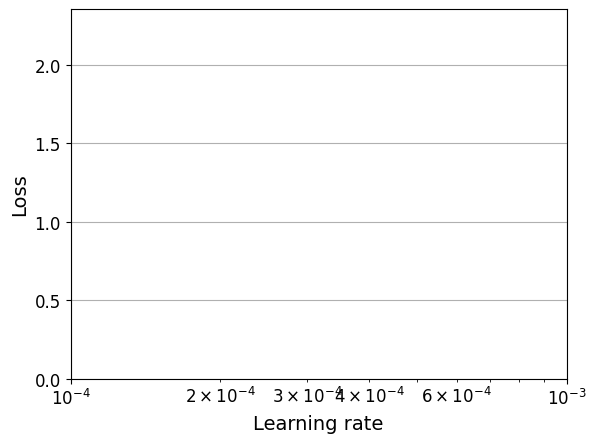

In [86]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [87]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [89]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [90]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [91]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=my_mnist_model.h5

In [92]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'my_mnist_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [93]:
%tensorboard --logdir=./my_mnist_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.
